In [1]:
import numpy as np
import matplotlib.pyplot as plt
from wham import WHAM

In [2]:
wham = WHAM('windows_reus1_T310_N17_alpha.dat')

In [3]:
wham.load_data(print_progress=True)

Loading coordinate data from data files
Loaded 33545 from `Data/stride100_rmsd_reus1_T310_N17_alpha.R0.dat`
Loaded 33545 from `Data/stride100_rmsd_reus1_T310_N17_alpha.R1.dat`
Loaded 33545 from `Data/stride100_rmsd_reus1_T310_N17_alpha.R2.dat`
Loaded 33542 from `Data/stride100_rmsd_reus1_T310_N17_alpha.R3.dat`
Loaded 33540 from `Data/stride100_rmsd_reus1_T310_N17_alpha.R4.dat`
Loaded 33540 from `Data/stride100_rmsd_reus1_T310_N17_alpha.R5.dat`
Loaded 33540 from `Data/stride100_rmsd_reus1_T310_N17_alpha.R6.dat`
Loaded 33540 from `Data/stride100_rmsd_reus1_T310_N17_alpha.R7.dat`
Loaded 33540 from `Data/stride100_rmsd_reus1_T310_N17_alpha.R8.dat`
Loaded 33542 from `Data/stride100_rmsd_reus1_T310_N17_alpha.R9.dat`
Loaded 33542 from `Data/stride100_rmsd_reus1_T310_N17_alpha.R10.dat`
Loaded 33542 from `Data/stride100_rmsd_reus1_T310_N17_alpha.R11.dat`
Loaded 33542 from `Data/stride100_rmsd_reus1_T310_N17_alpha.R12.dat`
Loaded 33545 from `Data/stride100_rmsd_reus1_T310_N17_alpha.R13.dat`
Load

In [4]:
wham.select_data() # select all data

Histogramming the data with 200 bin centers ranging from 0.8856793285737866 to 6.684506022498038


Text(0.5, 1.0, 'pdf_biased')

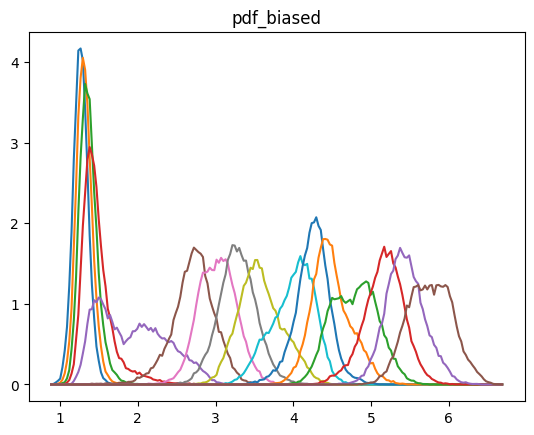

In [5]:
# histogram the data
wham.hist_data(print_progress=True)
for i in range(wham.Nw):
    plt.plot(wham.xi_binCenters, wham.pdf_biased[i])

plt.title('pdf_biased')

C:\Users\Julius\AppData\Local\Temp\ipykernel_9960\3438572725.py:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(wham.xi_binCenters, -wham.kT*np.log(wham.pdf_biased[i]))


Text(0.5, 1.0, 'pmf_biased')

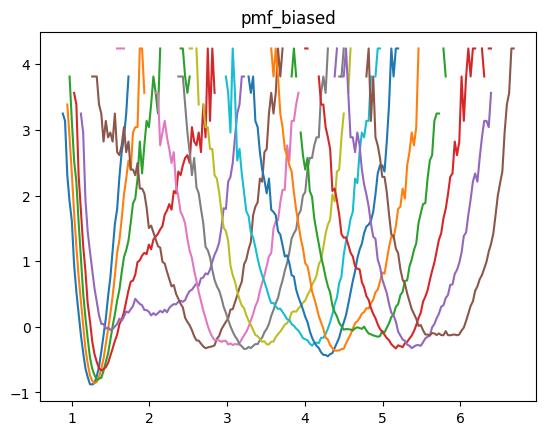

In [6]:
# biased pdfs -> biased pmfs
for i in range(wham.Nw):
    plt.plot(wham.xi_binCenters, -wham.kT*np.log(wham.pdf_biased[i]))

plt.title('pmf_biased')

C:\Users\Julius\AppData\Local\Temp\ipykernel_9960\3332324210.py:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(wham.xi_binCenters, (-wham.kT*np.log(wham.pdf_biased[i])


Text(0.5, 1.0, 'pmf_unbiased')

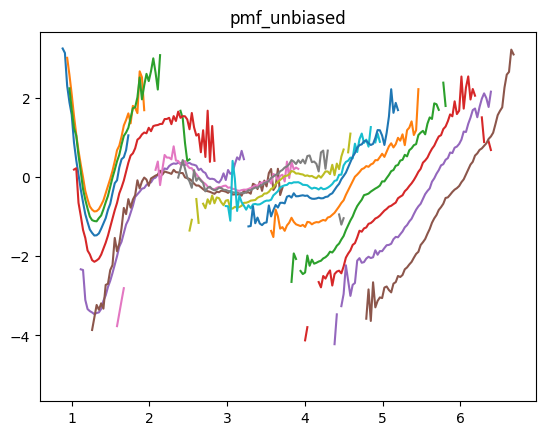

In [7]:
# unbias the pmfs by subtracting away the restraining potential w_i
for i in range(wham.Nw):
    plt.plot(wham.xi_binCenters, (-wham.kT*np.log(wham.pdf_biased[i])
                                  -wham.w_i[i]))

plt.title('pmf_unbiased')

Precomputing the numerator of Roux Eq. 8
Precomputing useful constants for Roux Eq. 8 and 9
Beginning WHAM iterations
WHAM iteration 100: 1.036521328923783
WHAM iteration 200: 0.12032274653688546
WHAM iteration 300: 0.009512889288743054
WHAM iteration 395: 7.568061161578044e-05
WHAM iterations finished


C:\Users\Julius\AppData\Local\Temp\ipykernel_9960\1635245255.py:6: RuntimeWarning: divide by zero encountered in log
  plt.plot(wham.xi_binCenters, (-wham.kT*np.log(wham.pdf_biased[i])


Text(0.5, 1.0, 'pmf_unbiased_aligned')

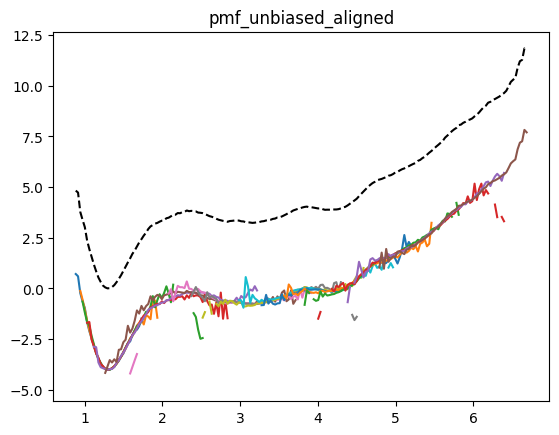

In [8]:
# apply the WHAM algorithm to find the free energy constants F_i
# required to align the unbiased pmfs from adjacent windows
wham.combine_windows(print_progress=True) 

for i in range(wham.Nw):
    plt.plot(wham.xi_binCenters, (-wham.kT*np.log(wham.pdf_biased[i])
                                  -wham.w_i[i]
                                  -wham.kT*np.log(wham.exp_F_i[i])))

# convert the overall unbiased pdf to an overall unbiaesd pmf
wham.pdf_to_pmf()
plt.plot(wham.xi_binCenters, wham.pmf, color='black', linestyle='--')

plt.title('pmf_unbiased_aligned')